### 4.10 Part 1.2-2
#### 1- creating subset
#### 2-analyzing the customers to define if Age parametre is important
#### 3-analyzing SpenderFlag and Incom correlation to define if it is important for group creation
#### 4-analyzing SpenderFlag and price_range correlation
  ##### 4.1 How many purchases do High spender/Low spender flag customers (by product price range)?
  #####  4.2 How many spend High spender/Low spender flag customers for different price range products?

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','sample_revenue.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [5]:
df.shape

(31156122, 30)

### 1 Creating subset with profiling variables

In [6]:
df_short=df[['user_id', 'STATE', 'Age','prices','price_range_loc','max_order',
        'spender_flag', 'income']].copy()

### 2 analyzing customers by Age

In [7]:
df_short.groupby(['Age']).value_counts(['max_order'])

Age  max_order
18   100          15741
     10           14267
     15           13699
     9            13406
     16           13325
                  ...  
81   69             598
     87             496
     66             486
     96             454
     65             375
Length: 5594, dtype: int64

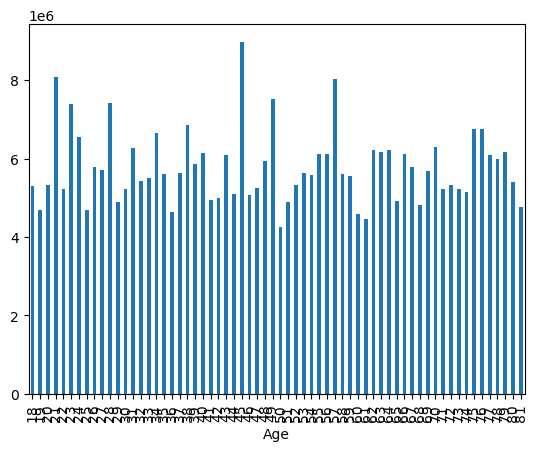

In [8]:
bar=df_short.groupby(['Age'])['prices'].sum().plot.bar()

#### saving plot

In [9]:
bar.figure.savefig(os.path.join(path,'Prepared Data', 'Entire_Age-Prices.png'))

### 3 analyzing customers by Spender Flag - Income

In [10]:
df_short.groupby(['spender_flag']).value_counts(['income'])

spender_flag  income
High spender  104142    2184
              136299    2024
              275853    2005
              257202    1937
              142893    1937
                        ... 
Low spender   51172        6
              158963       6
              128931       6
              52741        6
              34549        6
Length: 97780, dtype: int64

#### - creating plot Spender Flag - Income

In [11]:
df_short.groupby(['spender_flag'])['Age'].mean()

spender_flag
High spender    49.718325
Low spender     49.463211
Name: Age, dtype: float64

###  4 Analyzing Spender flag and Price range correlation
#### 4.1 How many purchases do High spender/Low spender flag customers (by product price range)?

In [12]:
df.groupby(['spender_flag','price_range_loc'])['price_range_loc'].count()

spender_flag  price_range_loc    
High spender                             3804
              hight_range_product       18491
              low_range_product        171171
              mid_range_product        414915
Low spender                            160776
              hight_range_product      379466
              low_range_product       9503688
              mid_range_product      20503811
Name: price_range_loc, dtype: int64

In [13]:
df.groupby(['price_range_loc','spender_flag'])['price_range_loc'].count()

price_range_loc      spender_flag
                     High spender        3804
                     Low spender       160776
hight_range_product  High spender       18491
                     Low spender       379466
low_range_product    High spender      171171
                     Low spender      9503688
mid_range_product    High spender      414915
                     Low spender     20503811
Name: price_range_loc, dtype: int64

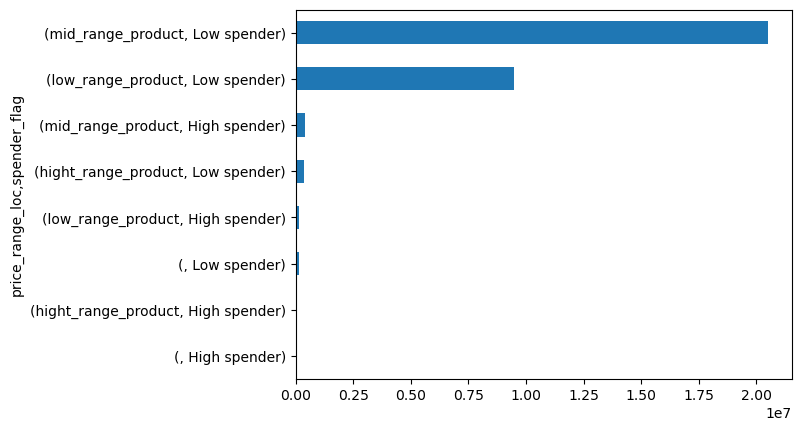

In [14]:
bar1=df.groupby(['price_range_loc','spender_flag'])['price_range_loc'].count().sort_values().plot.barh()

#### saving plot

In [15]:
bar1.figure.savefig(os.path.join(path,'Prepared Data', 'Entire_RangeProduct_SpenderFlag_NumberOfPurchases.png'))

#### 4.2 How many spend High spender/Low spender flag customers for different price range products?

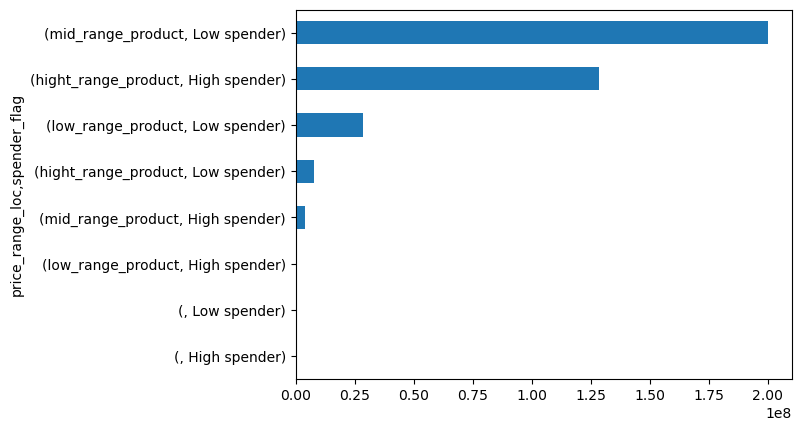

In [16]:
bar2=df.groupby(['price_range_loc','spender_flag'])['prices'].sum().sort_values().plot.barh()

#### saving the plot

In [17]:
bar2.figure.savefig(os.path.join(path,'Prepared Data', 'Entire_RangeProduct_SpenderFlag_Prices.png'))

### 5. Distribution of customers by State

#### 1. Creating data subset for entire db

In [18]:
DF=df[['STATE', 'user_id']]

In [19]:
DF1=DF.drop_duplicates()

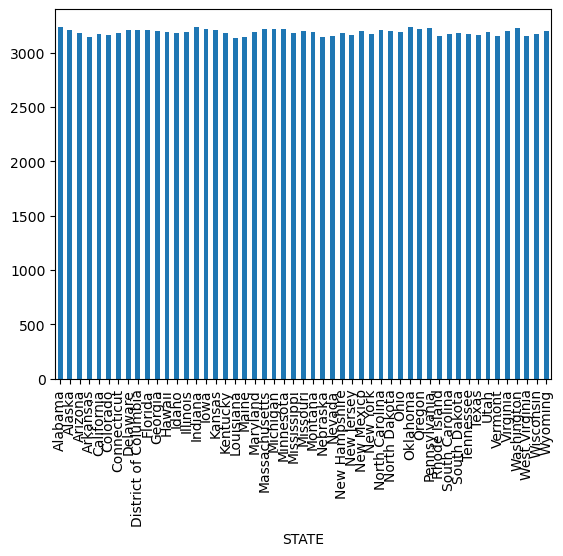

In [20]:
BAR=DF1.groupby('STATE')['user_id'].count().plot.bar()

In [21]:
BAR.figure.savefig(os.path.join(path,'Prepared Data', 'Entire_UserState.png'))